# Import common library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from mlxtend.feature_selection import SequentialFeatureSelector

<h1 style='font-weight:bold; color:orange'>Introduction to Machine Learning (Week 1)</h1>

<h1 style='font-weight:bold; color:orange'>3 Linear Regression (Week 2, Chapter 3)</h1>

<h2 style='font-weight:bold; color:#00bfff'> 3.1 Simple Linear Regression </h2>

<h3 style='color:#00bfff; font-weight:bold'>using statsmodel</h3>

`getwd()`<br>
`setwd('D:/machine-learning/data')`<br>
`boston = read.csv('boston.csv')`<br>
`model = lm('medv ~ .', data = boston)`<br>
`summary(model)`<br>


In [6]:
from statsmodels.api import OLS, add_constant

boston = pd.read_csv('data/boston.csv')
# Y = medv (Median value of owner-occupied homes in $1000s)

# response variable is medv
y = boston['medv']

# predictor variables are all other columns (13 columns)
x = boston.drop('medv', axis=1)

# add constant for the intercept to predictor variables
# If no constant added, it will pass through the origin (0,0)
x1 = add_constant(x)

# create and fit the OLS model
model = OLS(y, x1).fit()

# print the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          6.72e-135
Time:                        16:32:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3 style='font-weight:bold; color:#00bfff'> Using scikit-learn </h3>

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

boston = pd.read_csv('data/boston.csv')

y = boston['medv']
x = boston.drop('medv', axis=1)

from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
scale = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

x_train_num = scale.fit_transform(x_train.select_dtypes(include=['float64', 'int64']))
x_test_num = scale.fit_transform(x_test.select_dtypes(include=['float64', 'int64']))
x_train_cat = ohe.fit_transform(x_train.select_dtypes(include=['object']))
x_test_cat = ohe.fit_transform(x_test.select_dtypes(include=['object']))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x, y)

AttributeError: 'Series' object has no attribute 'select_dtypes'

<h1 style='font-weight:bold; color:orange'> 4 Classification (Week 3, Chapter 4) </h1>

In [ ]:
default = pd.read_csv('data/default.csv')
print(default.head(10))
print('--------------------------------------------')
print(default.shape)

  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
5      No     Yes   919.588530   7491.558572
6      No      No   825.513331  24905.226578
7      No     Yes   808.667504  17600.451344
8      No      No  1161.057854  37468.529288
9      No      No     0.000000  29275.268293
--------------------------------------------
(10000, 4)


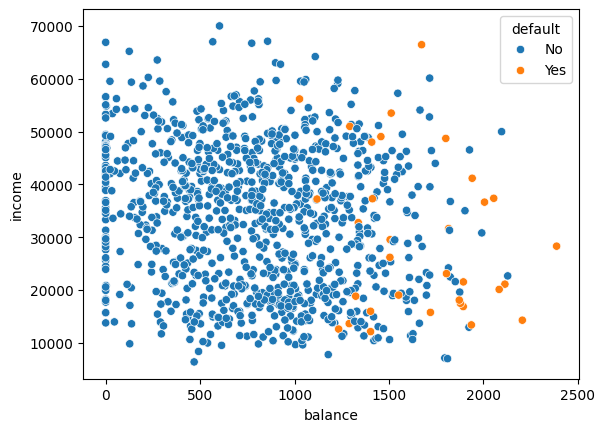

In [ ]:
sns.scatterplot(x='balance', y='income', data=default.sample(1000), hue='default')
plt.show();

income does not influence whether a person default or not but balance does influence where a person with higher balance is more likely to default than a person with a lower balance.

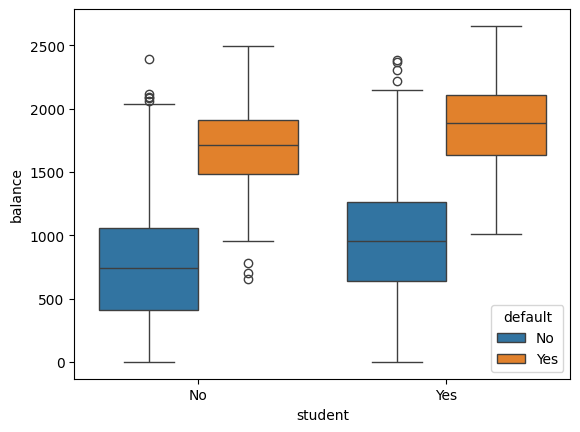

In [ ]:
sns.boxplot(x='student', y='balance', data=default, hue='default');

Student or not does not effect whether a person is a defaulter or not.

In [ ]:
default['Yes'] = (default['default'] == 'Yes').astype(int)
default.head(10)

,default,student,balance,income,Yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0
5,No,Yes,919.588530,7491.558572,0
6,No,No,825.513331,24905.226578,0
7,No,Yes,808.667504,17600.451344,0
8,No,No,1161.057854,37468.529288,0
9,No,No,0.000000,29275.268293,0


In [ ]:
import statsmodels.formula.api as smf
smf.logit(formula='Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<h2 style='font-weight:bold; color:skyblue'> Linear Discriminant Analysis </h2>

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define column names
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read the data set
dataset = pd.read_csv(url, names=cls)

<h1 style='font-weight:bold; color:orange'> 5 Resampling Methods (Week 4, Chapter 5) </h1>

<h2 style='font-weight:bold; color:#00bfff'> 5.1 Cross Validation </h2>

<h3 style='font-weight:bold; color:#00bfff'> 5.1.1 The Validation Set Approach </h3>

The validation set approach split the data into two comparable size to validate the training data

In [ ]:
# load data
auto = pd.read_csv('data/auto.csv')

# split data into training and test sets
auto_train, auto_test = train_test_split(auto, test_size=0.2, random_state=42)

# define the predictor and response variables for the training set
y_train = auto_train['mpg']
x_train = auto_train['horsepower'].values.reshape(-1, 1)

# define the predictor and response variables for the test set
y_test = auto_test['mpg']
x_test = auto_test['horsepower'].values.reshape(-1, 1)

# fit a linear regression model on the training set
lr = LinearRegression()
model = lr.fit(x_train, y_train)

# make predictions on the training set
train_pred = model.predict(x_train)

# make predictions on the test set
test_pred = model.predict(x_test)

# calculate the mean squared error on the training set
train_mse = mean_squared_error(y_train, train_pred)
print(f'Training MSE: {train_mse:.2f}')

# calculate the mean squared error on the test set
test_mse = mean_squared_error(y_test, test_pred)
print(f'Test MSE: {test_mse:.2f}')

Training MSE: 24.48
Test MSE: 22.15


In [ ]:
mse_train = []
mse_test = []

for i in range(10):
    # split data into training and test sets
    auto_train, auto_test = train_test_split(auto, test_size=0.2, random_state=i)

    # define the predictor and response variables for the training set
    y_train = auto_train['mpg']
    x_train = auto_train['horsepower'].values.reshape(-1, 1)

    # define the predictor and response variables for the test set
    y_test = auto_test['mpg']
    x_test = auto_test['horsepower'].values.reshape(-1, 1)

    # fit a linear regression model on the training set
    lr = LinearRegression()
    model = lr.fit(x_train, y_train)

    # make predictions on the training set
    train_pred = model.predict(x_train)

    # make predictions on the test set
    test_pred = model.predict(x_test)

    # calculate the mean squared error on the training set
    train_mse = mean_squared_error(y_train, train_pred)
    mse_train.append(train_mse)

    # calculate the mean squared error on the test set
    test_mse = mean_squared_error(y_test, test_pred)
    mse_test.append(test_mse)

print(f'Training MSE: {np.mean(mse_train):.2f}')
print(f'Test MSE: {np.mean(mse_test):.2f}')

Training MSE: 24.07
Test MSE: 23.62


<h3 style='font-weight:bold; color:#00bfff'> 5.1.2 Leave-One-Out-Cross-Validation </h3>

In [ ]:
# define x and y
y = auto['mpg']
x = auto.drop(['mpg', 'name', 'origin'], axis=1).values.reshape(-1, 6)

# define loocv
loo = LeaveOneOut()

# perform loocv with negative mse
neg_mse = cross_val_score(lr, x, y, cv=loo, scoring='neg_mean_squared_error')

# convert to rmse
rmse = np.sqrt(-neg_mse)

# print the mean rmse
print(f'LOOCV RMSE: {rmse.mean():.2f}')

LOOCV RMSE: 2.67


<h3 style='font-weight:bold; color:#00bfff'> 5.1.3 k-Fold Cross-Validation </h3>

In [ ]:
# define kfold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# negative mse
neg_mse = cross_val_score(lr, x, y, cv=kf, scoring='neg_mean_squared_error')

# convert to rmse
rmse = np.sqrt(-neg_mse)

# print the mean rmse
print(f'KFold RMSE: {rmse.mean():.2f}')

KFold RMSE: 3.43


In [ ]:
# manual k-fold

feature = []

model = LinearRegression()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# visualize the training and testing set for each folds
pd.DataFrame(kf.split(X))

mse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

np.mean(mse_scores)

Cuba buat manually to check output from the above function

In [ ]:
#  auto dataset has 392 rows and 9 columns

auto.sample(98)

(392, 9)

<h2 style='font-weight:bold; color:#00bfff'> 5.2 Bootstrap </h2>

<h1 style='font-weight:bold; color:orange'> 6 Linear Model Selection (Week 5, Chapter 6) </h1>

- This is also called **Feature Selection**
- alternative to least square

Advantage of Linear model
1. Inference

<h2 style='color:#00bfff; font-weight:bold'> 6.1 Subset Selection </h2>

<h3 style='color:#00bfff; font-weight:bold'> 6.1.1 Best Subset Selection </h3>

Fit a separate least square regression for each possible model. The number of model that we will fit is 2^p where p is the number of variable. For example, if a data has 20 predictor variable, then the number of model will be 2^20 = 1,048,576. This is a very high number of possibility and will use a lot of computational power to execute best subset selection.

**Cons**
1. Use high computational power if there is a lot number of variables
2. Higher search space leads to higher chance of finding model that overfit and have high variance on coefficient estimates

no 2 tu maksudnya lagi banyak option yang kita consider untuk bina model, lagi senang untuk kita dapat model yang perform bagus untuk training data tapi tak power untuk predict new/future data. Jadi model tu akan overfit dan ada variance yang tinggi.

<h3 style='color:#00bfff; font-weight:bold'> 6.1.2 Stepwise Selection </h3>

1. Forward Selection
2. Backward Selection
3. Forward-Backward Selection

<h4 style='color:#00bfff; font-weight:bold'> 6.1.2.1 Forward Selection </h4>

Begin with no predictor in the model. Then add one at a time until all predictors are in the model. 

Criteria when choosing model for each iteration
1. Lowest RSS
2. Highest R^2

In [ ]:
hitters = pd.read_csv('data/hitters.csv').dropna()

y = hitters['Salary']

df = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])

lr = LinearRegression()

def process(feature):
    model = lr.fit(x[feature], y)
    pred = model.predict(x[feature])
    mse = mean_squared_error(y, pred)
    return mse




,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,False,True,False,True,False,True
2,True,False,False,True,True,False
3,False,True,True,False,False,True
4,False,True,True,False,False,True
5,True,False,False,True,True,False
...,...,...,...,...,...,...
317,False,True,True,False,False,True
318,True,False,True,False,True,False
319,True,False,False,True,True,False
320,True,False,True,False,True,False


In [ ]:
# load data
hitters = pd.read_csv('data/hitters.csv').dropna()

# list out all columns with type 'object'
object = hitters.select_dtypes(include=['object']).columns

# remove all columns with type 'object'
hitter = hitters.drop(object, axis=1)

# define x and y
y = hitter['Salary'] 
x = hitter.drop('Salary', axis=1)

selected_features = []
remaining_features = list(x.columns)
scores_history = []
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for feature in remaining_features:
    current_features = selected_features + [feature] # add list to list, maybe can use append
    subset = x[current_features]
    

model = LinearRegression()
mse = cross_val_score(model, subset, y, cv=kf, scoring='neg_mean_squared_error')
avg_mse = np.mean(mse)

np.argmax()

-205708.8753359605


<h4 style='font-weight:bold; color:#00bfff'> Backward Selection </h4>

In [ ]:
x = add_constant(hitter.drop('Salary', axis=1))
y = hitter['Salary']

model = OLS(y, x).fit()

feature = list(x.columns)

while len(feature) > 0:
    x_opt = x[feature]
    model = OLS(y, x_opt).fit()
    p_val = model.pvalues
    max_p_val = p_val.max()

    if max_p_val > 0.05:
        excluded_feature = p_val.idxmax()
        feature.remove(excluded_feature)
        print(max_p_val)

    else:
        break

model

<h4 style='font-weight:bold; color:#00bfff'> Forward-Backward Selection </h4>

<h1 style='font-weight:bold; color:orange'> 7 Nonlinear models (Week 6, Chapter 7) </h1>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.api import GLS

In [ ]:
wage = pd.read_csv('data/wage.csv')
print(wage.shape)
print('--------------------------------------------')
print(wage.head(5))
print('--------------------------------------------')
print(wage.info())

(3000, 12)
--------------------------------------------
   year  age      sex            maritl      race        education  \
0  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
1  2004   24  1. Male  1. Never Married  1. White  4. College Grad   
2  2003   45  1. Male        2. Married  1. White  3. Some College   
3  2003   43  1. Male        2. Married  3. Asian  4. College Grad   
4  2005   50  1. Male       4. Divorced  1. White       2. HS Grad   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   
3  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.041393   
4  2. Middle Atlantic  2. Information       1. <=Good     1. Yes  4.318063   

         wage  
0   75.043154  
1   70.476020  
2  130

In [ ]:
x = add_constant(wage['age'])
y = wage['wage']
model = OLS(y, x).fit()
prediction = model.predict(x)

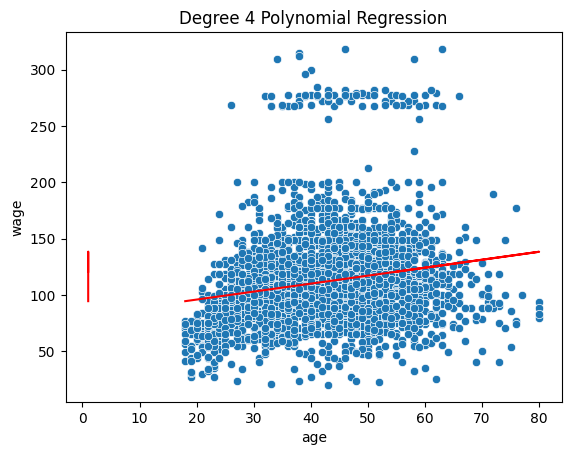

In [ ]:
sns.scatterplot(x='age', y='wage', data=wage)
plt.plot(x, prediction, color='red', label='predicted value')
plt.title('Degree 4 Polynomial Regression')
plt.show();

In [ ]:
x_poly = PolynomialFeatures(degree=2).fit_transform(wage['age'].values.reshape(-1, 1))
y = wage['wage']

print(LinearRegression().fit(x_poly, y).intercept_)

-10.425224262028578


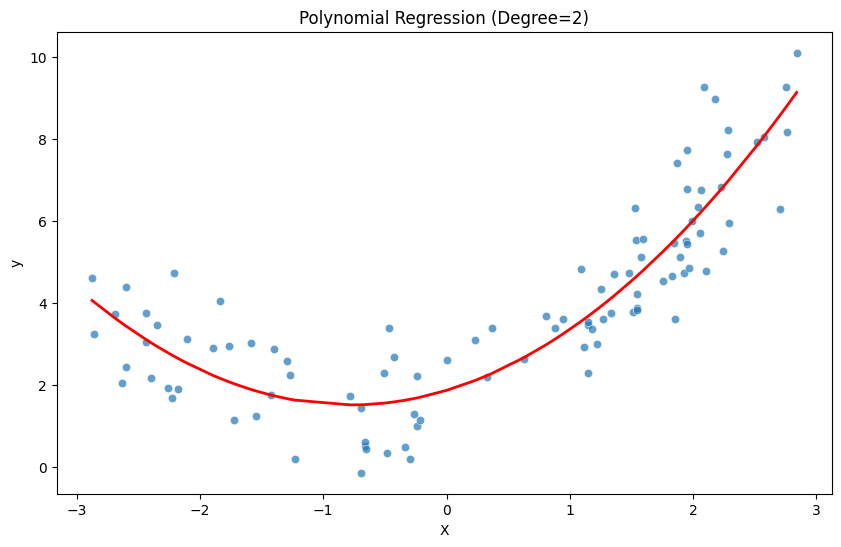

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit model and predict
model = LinearRegression().fit(X_poly, y)
predictions = model.predict(X_poly)

# Sort X and predictions for proper plotting
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
predictions_sorted = predictions[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_sorted[:, 0], y=y[sorted_indices][:, 0], alpha=0.7)
plt.plot(X_sorted[:, 0], predictions_sorted[:, 0], 'r-', linewidth=2)
plt.title("Polynomial Regression (Degree=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [68]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) # try to include bias
x_poly = poly.fit_transform(X)
prediction = LinearRegression().fit(x_poly, y).predict(x_poly)

sns.scatterplot(x=x_poly, y=y)
plt.plot(X, prediction)

ValueError: Per-column arrays must each be 1-dimensional

<h1 style='font-weight:bold; color:orange'> 8 Tree Based Method </h1>

<h2 style='font-weight:bold; color:skyblue'> Classification Tree </h2>

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [2]:
carseat = pd.read_csv('data/carseats.csv')
print(carseat.head())
print('=======================')
carseat.info()

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   

In order to use classification tree, we need to convert reponse predictor variables into categorical and all categorical predictor variables into continous
* X (predictor) : categorical to continous
* Y (response) : continous to categorical (1 and 0)

In [11]:
# convert continous variable 'Sales' into categorical 'High', 1 if Sales > 8 else 0
carseat['High'] = carseat['Sales'].apply(lambda x: 1 if x > 8 else 0)

carseat['ShelveLoc'] = carseat['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})
carseat['Urban'] = carseat['Urban'].map({'No': 0, 'Yes': 1})
carseat['US'] = carseat['US'].map({'No': 0, 'Yes':1})

In [ ]:
# define response and predictor variables
y = carseat['High']
x = carseat.drop(['Sales', 'High'], axis=1)

# split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# fit model
model = DecisionTreeClassifier(max_depth=6, random_state=42)
model.fit(x_train, y_train)
print(f'Model Score for Training Set: {(model.score(x_train, y_train) * 100):.2f}%')


Model Score for Training Set: 91.56%


In [17]:
pred = model.predict(x_test)
print(f'Model Score for Test Set: {(model.score(x_test, y_test) * 100):.2f}%')

Model Score for Test Set: 77.50%


In [21]:
pd.DataFrame(confusion_matrix(y_test, pred).T, index = ['Yes', 'No'], columns=['Yes', 'No'])

,Yes,No
Yes,37,12
No,6,25


<h2 style='font-weight:bold; color:skyblue'> Bagging </h2>

<h2 style='font-weight:bold; color:skyblue'> Random Forest Regressor </h2>

In [27]:
boston = pd.read_csv('data/boston.csv')
print(boston.head())
print('=======================')
print(boston.info())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

In [41]:
# define response and predictor variables
x = boston.drop('medv', axis=1)
y = boston['medv'] # median value of owner-occupied homes in $1000s

# split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# fit random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
model = rf.fit(x_train, y_train)

# make predictions on the test set
pred = rf.predict(x_test)

print(f'Model Score for Test Set: {(model.score(x_test, y_test) * 100):.2f}%')


Model Score for Test Set: 89.23%


<h1 style='font-weight:bold; color:orange'> 9 Suppport Vector Machine (SVM) </h1>

In [61]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [51]:
# Optical Recognition of Handwritten Digits dataset
train = pd.read_csv('data/optdigits.tra', header=None)
x_train = train.drop(64, axis=1)  # drop the last column (label)
y_train = train[64]  # last column is the label

test = pd.read_csv('data/optdigits.tes', header=None)
x_test = test.drop(64, axis=1)  # drop the last column (label)
y_test = test[64]  # last column is the label

print(f'Train set shape: {x_train.shape}')
print(f'Test set shape: {x_test.shape}')

Train set shape: (3823, 64)
Test set shape: (1797, 64)


In [53]:
print(f'Null values in train set: {train.isna().sum().sum()}')
print(f'Duplicated values in train set: {train.duplicated().sum()}')
print(f'Null values in test set: {test.isna().sum().sum()}')
print(f'Duplicated values in test set: {test.duplicated().sum()}')

Null values in train set: 0
Duplicated values in train set: 0
Null values in test set: 0
Duplicated values in test set: 0


In [60]:
svc = SVC(kernel='linear', C=10, random_state=42)
svc.fit(x_train, y_train)

pred = svc.predict(x_train)
print(f'Train set accuracy: {(svc.score(x_train, y_train) * 100):.2f}%')
print(pd.DataFrame(confusion_matrix(y_train, pred)))
print('===================================================')
print(f'Test set accuracy: {(svc.score(x_test, y_test) * 100):.2f}%')
print(pd.DataFrame(confusion_matrix(y_test, svc.predict(x_test))))

Train set accuracy: 100.00%
     0    1    2    3    4    5    6    7    8    9
0  376    0    0    0    0    0    0    0    0    0
1    0  389    0    0    0    0    0    0    0    0
2    0    0  380    0    0    0    0    0    0    0
3    0    0    0  389    0    0    0    0    0    0
4    0    0    0    0  387    0    0    0    0    0
5    0    0    0    0    0  376    0    0    0    0
6    0    0    0    0    0    0  377    0    0    0
7    0    0    0    0    0    0    0  387    0    0
8    0    0    0    0    0    0    0    0  380    0
9    0    0    0    0    0    0    0    0    0  382
Test set accuracy: 96.10%
     0    1    2    3    4    5    6    7    8    9
0  177    0    0    0    0    1    0    0    0    0
1    0  178    0    0    0    0    3    0    1    0
2    0    7  170    0    0    0    0    0    0    0
3    1    0    5  171    0    2    0    2    1    1
4    0    0    0    0  180    0    0    0    1    0
5    0    0    1    0    0  180    0    0    0    1
6    0    

In [67]:
# determine the optimal value of C
tuned_parameters = {'C': [0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(SVC(kernel='linear', random_state=42), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(x_train, y_train)
clf.best_params_

{'C': 0.1}

In [68]:
svc = SVC(kernel='linear', C=0.1, random_state=42)
svc.fit(x_train, y_train)

pred = svc.predict(x_train)
print(f'Train set accuracy: {(svc.score(x_train, y_train) * 100):.2f}%')
print(pd.DataFrame(confusion_matrix(y_train, pred)))
print('===================================================')
print(f'Test set accuracy: {(svc.score(x_test, y_test) * 100):.2f}%')
print(pd.DataFrame(confusion_matrix(y_test, svc.predict(x_test))))

Train set accuracy: 99.97%
     0    1    2    3    4    5    6    7    8    9
0  376    0    0    0    0    0    0    0    0    0
1    0  389    0    0    0    0    0    0    0    0
2    0    0  380    0    0    0    0    0    0    0
3    0    0    0  389    0    0    0    0    0    0
4    0    0    0    0  387    0    0    0    0    0
5    0    0    0    0    0  376    0    0    0    0
6    0    0    0    0    0    0  377    0    0    0
7    0    0    0    0    0    0    0  387    0    0
8    0    1    0    0    0    0    0    0  379    0
9    0    0    0    0    0    0    0    0    0  382
Test set accuracy: 96.16%
     0    1    2    3    4    5    6    7    8    9
0  177    0    0    0    0    1    0    0    0    0
1    0  177    0    0    0    0    3    0    2    0
2    0    7  170    0    0    0    0    0    0    0
3    1    0    5  171    0    2    0    2    1    1
4    0    0    0    0  180    0    0    0    1    0
5    0    0    1    0    0  180    0    0    0    1
6    0    0

<h2 style='font-weight:bold; color:skyblue'> Radial Basis Function (RBF) </h2>

<h1 style='font-weight:bold; color:orange'> 10 Unsupervised Learning </h1>

<h2 style='font-weight:bold; color:skyblue'> 10.1 Principal Component Analysis (PCA) </h2>

In [79]:
import pandas as pd

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [76]:
df = pd.read_csv('Data/USArrests.csv')
print(df.head())
print('====================================================')
df.info()

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [80]:
x = df.drop('Unnamed: 0', axis=1)

scale = StandardScaler()
x_scale = scale.fit_transform(x)

pca = PCA()
pca.fit(x_scale)

PCA()

<h2 style='font-weight:bold; color:skyblue'> 10.2 K-Means </h2>

<h2 style='font-weight:bold; color:skyblue'> 10.3 Hierarchical Clustering </h2>

In [91]:
import pandas as pd

from scipy.cluster.hierarchy import linkage

In [87]:
nci_labs = pd.read_csv("data/NCI60_labs.csv", index_col=0)
nci_data = pd.read_csv('data/nci60_data.csv', index_col=0)
print(nci_labs.head())
print('====================================================')
print(nci_data.head()) # data with a huges number of features (around 6830)

        x
1     CNS
2     CNS
3     CNS
4   RENAL
5  BREAST
           1         2         3         4         5             6         7  \
V1  0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02  0.350000   
V2  0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01  0.699961   
V3  0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00  0.090000   
V4  0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17  0.170000   
V5  0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03  0.085000   

           8         9        10  ...      6821      6822      6823      6824  \
V1 -0.315000 -0.450000 -0.654980  ... -0.990020  0.000000  0.030000 -0.175000   
V2  0.724961 -0.040039 -0.285019  ... -0.270058 -0.300039 -0.250039 -0.535039   
V3  0.645000  0.430000  0.475019  ...  0.319981  0.120000 -0.740000 -0.595000   
V4  0.245000  0.020000  0.095019  ... -1.240020 -0.110000 -0.160000  0.095000   
V5  0.110000  0.235000  1.490019  ...  0.554980 -0.775

In [ ]:
?linkage

In [94]:
nci_hc_complete = linkage(y = nci_data, method="complete", metric='euclidean') 
nci_hc_complete

array([[ 49.        ,  50.        ,  38.23033267,   2.        ],
       [ 56.        ,  57.        ,  39.10562479,   2.        ],
       [ 48.        ,  64.        ,  39.99989876,   3.        ],
       [ 20.        ,  21.        ,  45.15158096,   2.        ],
       [ 34.        ,  35.        ,  45.35338129,   2.        ],
       [ 36.        ,  68.        ,  48.01162819,   3.        ],
       [  0.        ,   1.        ,  51.43823073,   2.        ],
       [ 60.        ,  61.        ,  56.78015373,   2.        ],
       [ 11.        ,  12.        ,  57.91726379,   2.        ],
       [ 41.        ,  43.        ,  60.49650657,   2.        ],
       [ 38.        ,  39.        ,  61.55425326,   2.        ],
       [ 30.        ,  31.        ,  61.63750362,   2.        ],
       [ 14.        ,  15.        ,  62.1780594 ,   2.        ],
       [ 13.        ,  76.        ,  62.78163258,   3.        ],
       [ 44.        ,  45.        ,  63.26414098,   2.        ],
       [ 59.        ,  71

<h1 style='font-weight:bold; color:orange'> 11 Neural Network </h1>

<h2 style='font-weight:bold; color:skyblue'> 11.1 Feed-Forward Neural Network (FFNN) </h2>

In [115]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [105]:
# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)  

irisdata.head()  


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
y = irisdata['Class']
x = irisdata.drop('Class', axis=1)
print(y.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train.values.ravel())

pred = mlp.predict(x_test)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=42)

<h2 style='font-weight:bold; color:skyblue'> 11.3 Alternative using Tensorflow </h2>

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.5-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached h5py-3.14.0-cp311-cp311-win_amd64.whl.metadata (2.7 kB)
  Using cached m

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\user\\AppData\\Local\\Temp\\pip-unpack-ac2gk7p5\\tensorflow-2.19.0-cp311-cp311-win_amd64.whl'
Consider using the `--user` option or check the permissions.



In [119]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

NameError: name 'tf' is not defined

<h1 style='font-weight:bold; color:orange'> 12 Deep Learning </h1>

<h1 style='font-weight:bold; color:orange'> Test </h1>

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

In [96]:
df = pd.read_table('Test/question_2.txt', sep=',')
df.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [97]:
# define response (Y) and predictor (X) variables
y = df['Compressive Strength (28-day)(Mpa)']
x = df.drop(['Compressive Strength (28-day)(Mpa)', 'SLUMP(cm)', 'FLOW(cm)', 'No'], axis = 1)

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
lr = LinearRegression()

model = lr.fit(x_train, y_train)

var = x.columns.tolist()

print(pd.DataFrame({'Variable': var, 'Coefficient': model.coef_}))
print(f'Intercept: {model.intercept_:.2f}')


       Variable  Coefficient
0        Cement     4.898330
1          Slag    -1.755212
2       Fly ash     4.658713
3         Water    -4.545214
4            SP     0.423314
5  Coarse Aggr.    -4.638413
6    Fine Aggr.    -2.257704
Intercept: 35.82


In [48]:
mse = mean_squared_error(y_train, model.predict(x_train))

print(f'MSE: {mse:.2f}')

MSE: 6.90


In [63]:
?SequentialFeatureSelector

Init signature:
SequentialFeatureSelector(
    estimator,
    *,
    n_features_to_select='auto',
    tol=None,
    direction='forward',
    scoring=None,
    cv=5,
    n_jobs=None,
)
Docstring:     
Transformer that performs Sequential Feature Selection.

This Sequential Feature Selector adds (forward selection) or
removes (backward selection) features to form a feature subset in a
greedy fashion. At each stage, this estimator chooses the best feature to
add or remove based on the cross-validation score of an estimator. In
the case of unsupervised learning, this Sequential Feature Selector
looks only at the features (X), not the desired outputs (y).

Read more in the :ref:`User Guide <sequential_feature_selection>`.

.. versionadded:: 0.24

Parameters
----------
estimator : estimator instance
    An unfitted estimator.

n_features_to_select : "auto", int or float, default="auto"
    If `"auto"`, the behaviour depends on the `tol` parameter:

    - if `tol` is not `None`, then features

<span style='font-weight:bold'> Forward Selection </span>

In [64]:
sfs = SequentialFeatureSelector(lr,
                                direction='forward',
                                scoring='neg_mean_squared_error')

sfs.fit(x_train, y_train)

selected_features = sfs.get_feature_names_out()
print(selected_features)

['x0' 'x2' 'x3']


<span style='font-weight:bold'> Backward Elimination </span>

In [ ]:
?SequentialFeatureSelector

In [65]:
sfs = SequentialFeatureSelector(lr,
                                direction='backward',
                                scoring='neg_mean_squared_error',)
sfs.fit(x_train, y_train)
selected_features = sfs.get_feature_names_out()
print(selected_features)

['x0' 'x2' 'x3' 'x5']


In [26]:
best_model = LinearRegression()
best_model.fit(x_train[selected_features], y_train)

x_pred_best = best_model.predict(x_test[selected_features])
mse_best = mean_squared_error(y_test, x_pred_best)
print(f'Best Model MSE: {mse_best:.2f}')

Best Model MSE: 7.53


In [58]:
ridge = Ridge()

model_ridge = ridge.fit(x_train, y_train)
y_pred_ridge = model_ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Model MSE: {mse_ridge:.2f}')
print(f'Ridge Coefficients: {pd.DataFrame(model_ridge.coef_)}')

Ridge Model MSE: 4.13
Ridge Coefficients:           0
0  5.200274
1 -1.297764
2  5.028981
3 -4.088444
4  0.484226
5 -3.959651
6 -1.792877


In [56]:
lasso = Lasso()
model_lasso = lasso.fit(x_train, y_train)
y_pred_lasso = model_lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Model MSE: {mse_lasso:.2f}')


print(f'Lasso Coefficients: {pd.DataFrame(model_lasso.coef_)}')


Lasso Model MSE: 12.55
Lasso Coefficients:           0
0  4.536146
1  0.000000
2  4.648158
3 -1.174593
4  0.000000
5 -0.321955
6 -0.000000
